## Image compression with the SVD

The singular value decomposition is a great tool for the low-rank approximation of data sets. A great way to visualize the low-rank approximation property of the SVD is image compression. While there are far more efficient ways to compress images, it is a nice way to visualize what the SVD does.

A gray-scale image is nothing but a matrix where each element has a value that describes the gray-scale from white to black. Below is a short code that loads a Scipy example image and displays it.

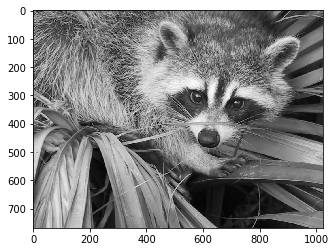

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.misc
image = scipy.misc.face(gray=True)
plt.imshow(image,cmap=plt.gray())

Your task is to write code that computes from this image low-rank approximations of rank r and to display the resulting image in the same way as shown above. For this you will need to Scipy svd function, which is available from scipy.linalg.

**Solution:** The following code plots low-rank approximation of the image with given rank n. Vary n to see how the rank influences the image quality.

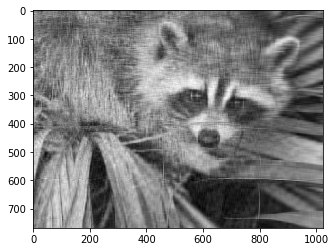

In [4]:
%matplotlib inline
n = 30 # Change n to get different low-rank compressions. The original has n=512
import scipy
import numpy as np
from scipy.linalg import svd
import scipy.misc
image = scipy.misc.face(gray=True)
U,S,Vh = svd(image)
image_compressed = np.dot(np.dot(U[:,:n],np.diag(S[:n])),Vh[:n,:])
from matplotlib import pyplot as plt
plt.imshow(image_compressed,cmap=plt.gray())

## Rank Detection with the SVD

The SVD is great to detect the approximate rank of a given matrix. The following code generates a random low-rank matrix and numerically perturbs it. Having data with perturbations is a common case in practical applications.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import svd
n = 100
exact_rank = 30
perturbation = 1E-8
B = np.random.randn(n,exact_rank)
C = np.random.randn(n,exact_rank)
A = np.dot(B,C.T)+ perturbation*np.random.rand(n,n)


We now consider that we are given only the matrix A without knowing the precise rank of the matrix. Plot the singular values of B. Can you see the numerical noise level from this plot? Try to recover via low-rank approximation the original unperturbed low-rank matrix $A\approx BC^T$.

\|B*C^T-A_filtered\|_2 = 4.495624e-07


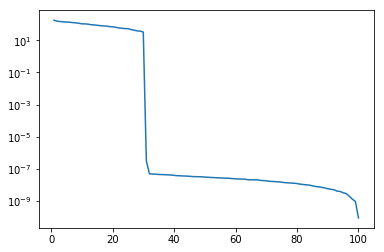

In [4]:
U,s,Vh = svd(A,full_matrices=False)
plt.semilogy(1+np.arange(len(s)),s)
A_filtered = np.dot(U[:,:exact_rank],np.dot(np.diag(s[:exact_rank]),Vh[:exact_rank,:]))
print("\|B*C^T-A_filtered\|_2 = %e" % np.linalg.norm(np.dot(B,C.T)-A_filtered))

In [2]:
from scipy.linalg import hilbert
from scipy.linalg import svdvals

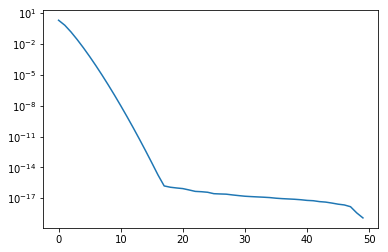

In [3]:
s = svdvals(hilbert(50))
plt.semilogy(s)